In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import param_generation as pg
import helpers as hp
from ipywidgets import GridspecLayout,HBox,widgets
from IPython.display import Audio, display
import librosa
import random
#let's play the sound given the parameters
import imp
imp.reload(pg)
imp.reload(hp)

sr=41000
score_cols=['clap', 'guitar', 'hat', 'kick', 'noise', 'piano', 'rim', 'shake', 'snare', 'synth', 'tom', 'voc']
classes_ranked=[c+"_rank" for c in score_cols]
param_cols=['oscType_0',
       'isNoise_0', 'A_0', 'D_0', 'S_0', 'R_0', 'pitch_0_0', 'pitch_1_0',
       'pitch_2_0', 'pitch_3_0', 'amplitude_0', 'bpCutLow_0', 'bpCutHigh_0',
       'bpOrder_0', 'length_0', 'start_0']

pc_no_num=[x[0:-2] for x in param_cols] # param columns with no _# 
df = pd.read_csv("csvs/param_scores.csv",error_bad_lines=False)

df.columns=[*classes_ranked,*score_cols,*param_cols]
# df["oscType_0"]=df["oscType_0"].replace(dict(zip(["sine","square","saw"],[0,1,2])))
df=df.fillna(0)


In [2]:
df[score_cols].describe().loc[["mean","std","25%","50%","75%"]]

,clap,guitar,hat,kick,noise,piano,rim,shake,snare,synth,tom,voc
mean,0.022862,0.065698,0.102886,0.101753,0.111743,0.053124,0.039869,0.062467,0.051820,0.184216,0.092405,0.111157
std,0.028085,0.034705,0.026630,0.037561,0.022646,0.043065,0.029811,0.042365,0.038276,0.043652,0.038929,0.031230
25%,0.000000,0.041521,0.084411,0.078717,0.097647,0.016794,0.013788,0.026042,0.021544,0.157095,0.066582,0.091830
50%,0.012806,0.064168,0.100465,0.102492,0.110452,0.048982,0.039002,0.066232,0.046348,0.183982,0.093287,0.110062
75%,0.037393,0.088618,0.118846,0.122819,0.124189,0.078665,0.062010,0.094557,0.077157,0.211227,0.120149,0.129559


In [3]:
df[classes_ranked].describe().loc[["mean","std","25%","50%","75%"]]

,clap_rank,guitar_rank,hat_rank,kick_rank,noise_rank,piano_rank,rim_rank,shake_rank,snare_rank,synth_rank,tom_rank,voc_rank
mean,10.546996,7.643959,4.871111,5.073655,4.129483,8.495697,9.449435,7.765849,8.503764,1.491109,5.814992,4.213950
std,1.817293,2.519594,2.060790,2.643770,1.615515,2.883838,1.954160,2.949468,2.739956,1.269756,2.824196,2.120118
25%,10.000000,6.000000,3.000000,3.000000,3.000000,7.000000,8.000000,6.000000,7.000000,1.000000,3.000000,2.000000
50%,11.000000,8.000000,5.000000,5.000000,4.000000,9.000000,10.000000,8.000000,9.000000,1.000000,6.000000,4.000000
75%,12.000000,10.000000,6.000000,7.000000,5.000000,11.000000,11.000000,10.000000,11.000000,1.000000,8.000000,6.000000


<Figure size 1080x540 with 0 Axes>

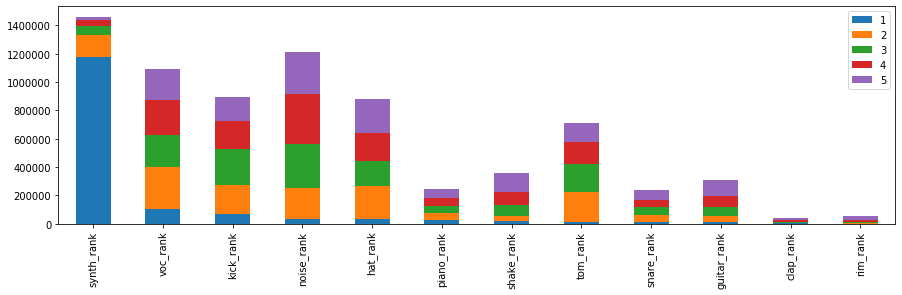

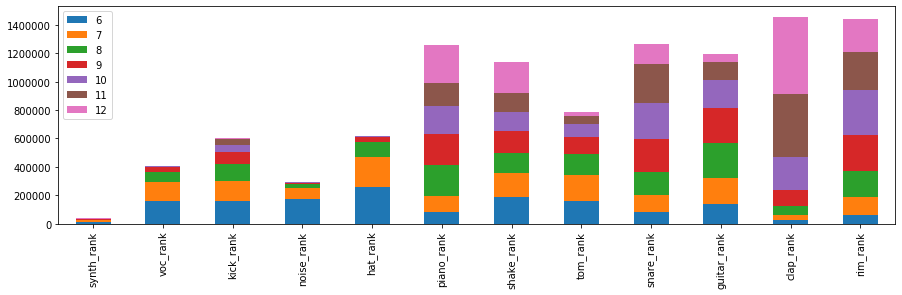

In [4]:
#visualizing ranks per group
gc=pd.DataFrame(columns=range(1,5))
for c in classes_ranked:
    gc=gc.append(df[c].astype(int).value_counts())

gc=gc.sort_values(by=[1,2],ascending=False)
fig = plt.gcf()
fig.set_size_inches(15, 7.5)

gc[list(range(1,6))].plot(kind="bar",figsize=(15,4),stacked=True)

gc[list(range(6,13))].plot(kind="bar",figsize=(15,4),stacked=True)

In [5]:
#Let's hear some of the "best" generated sounds for each group, set g to "sound group" of choice
g="kick"
selection=df[(df[g]>0.22) & (df[g+"_rank"]<2) & (df["synth_rank"]>3)].reset_index(drop=True)
print(selection.shape)

x,y=3,4
grid = GridspecLayout(x, y)
for i in range(x):
    for j in range(y):
        r=selection.iloc[random.randint(0,selection.shape[0]-1)]
        r=r[param_cols]
        pset=hp.rToParams(r)
        out=pg.ensemble([pset])
        o= widgets.Output()
        with o:
            display(Audio(hp.memToAud(out),rate=sr,autoplay=False))
        grid[i, j] = o
display(grid)


(87, 40)


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [6]:
#constructing multivariate distributions to sample from
#get params, get cov matrix, construct distribution
v=selection[param_cols].to_numpy().T
#convert oscType column to 
cov=np.cov(v)
mu=v.mean(1)
#average
pd.DataFrame([mu],columns=param_cols)
selection[param_cols].describe()

,oscType_0,isNoise_0,A_0,D_0,S_0,R_0,pitch_0_0,pitch_1_0,pitch_2_0,pitch_3_0,amplitude_0,bpCutLow_0,bpCutHigh_0,bpOrder_0,length_0,start_0
count,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.080460,0.0,0.804598,1.597701,0.896552,1.954023,2867.495892,2412.475800,1236.680432,1505.745703,0.640230,510.098410,2724.260897,2.436782,0.649937,0.119386
std,0.380281,0.0,1.108520,0.970013,1.110567,1.033261,4485.689625,4542.723349,3055.349084,3084.799436,0.273844,779.694486,3799.355042,1.939199,0.141272,0.137161
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,18.354048,17.323914,17.323914,16.351598,0.300000,30.000000,38.661909,2.000000,0.447214,0.000000
25%,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,71.355925,35.677962,34.647829,35.677962,0.300000,43.889872,166.566507,2.000000,0.546874,0.000000
50%,0.000000,0.0,0.000000,1.000000,0.000000,2.000000,116.540940,69.295658,61.735413,82.406889,0.800000,106.642780,569.614099,2.000000,0.632456,0.081677
75%,0.000000,0.0,2.000000,2.000000,2.000000,3.000000,6842.437580,1548.730524,240.011766,1438.445309,0.800000,642.175962,4054.030835,2.000000,0.730297,0.180150
max,2.000000,0.0,3.000000,3.000000,3.000000,3.000000,14917.240369,15804.265640,14917.240369,14080.000000,1.000000,3717.063955,15000.000000,16.000000,0.894427,0.552786


In [52]:
#you can see this approach sucks
imp.reload(pg)
imp.reload(hp)

def randomSample(t=0):
    p=np.random.multivariate_normal(mu,cov)
    p_dataframed=pd.DataFrame([p],columns=param_cols)
    p_series=p_dataframed.iloc[0][param_cols]
    pset=hp.rToParams(p_series)
    o=pg.ensemble([pset])
    o=librosa.util.normalize(hp.memToAud(o))
    return o,pset,t
o,pset,t=randomSample()
Audio(o,rate=sr,autoplay=True)

In [167]:
#let's try evolution strategys with deap
import scorer
import imp
imp.reload(scorer)
from deap import base, creator
import random
from deap import tools
import scipy.spatial.distance as d


toolbox = base.Toolbox()
POP_SIZE = 10
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def initIndividual(icls):
    z=icls(selection[param_cols].iloc[random.randint(0,10)].values)
    return z

def initPopulation(pcls, ind_init):
    return pcls(ind_init() for c in range(0,POP_SIZE) )

toolbox.register("individual_guess", initIndividual, creator.Individual)
toolbox.register("population_guess", initPopulation, list, toolbox.individual_guess)

solution=selection[param_cols].iloc[1].values
z=0
def evaluate(individual):
    distance=d.minkowski(individual,solution) # distance between params and the "ideal drum"
    dscore=sum([distance])**(0.5)
    ind_df=pd.DataFrame([individual],columns=param_cols)
    p_series=ind_df.iloc[0]
    ear_score=-1
    try:
        scores=scorer.rank_score(p_series)
        ear_score=scores["kick_rank"]
    except:
        ear_score=20

    print (dscore,ear_score)
    return (dscore/ear_score,)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("evaluate", evaluate)
def main():
    pop = toolbox.population_guess()
    CXPB, MUTPB, NGEN = 0.5, 0.2, 100
    # Evaluate the entire population
    fitnesses = map(toolbox.evaluate, pop)
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        # Apply crossover and mutation on the offspring
        for child1, child2 in list(zip(offspring[::2], offspring[1::2])):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        pop[:] = offspring
    return pop
z=main()
len(z)
for i in z:
    print(evaluate(i),i)

33.27963606659799 1.0
61.23880671191877 1.0
55.883218093176936 1.0
0.0 1.0
55.883218093176936 1.0
133.50888013414456 1.0
64.775709286606 1.0
61.23880671191877 1.0
64.775709286606 1.0
133.50888013414456 1.0
133.50888013414456 1.0
133.50888013414456 1.0
133.50888013414456 1.0
133.50888013414456 1.0
133.5088804880135 1.0
133.50920624216195 1.0
133.50888013414456 1.0
133.50887669783373 1.0
133.50888013414456 1.0
133.50888013414456 1.0
133.50920624216195 1.0
133.50920624216195 1.0
133.50920624216195 1.0
133.50888013414456 1.0
133.5088804880135 1.0
133.50920633457972 1.0
133.50920624216195 1.0
133.50920624216195 1.0
133.50920633457972 1.0
133.50920633457972 1.0
133.50952266920265 1.0
133.509201374166 1.0
133.50952762958056 1.0
133.5092481912868 1.0
133.50949891094774 1.0
133.50952762958056 1.0
133.50952762958056 1.0
133.50952762958056 1.0
133.5095276644321 1.0
133.50952762958056 1.0
133.50952762958056 1.0
133.5095276221859 1.0
133.50952767182676 1.0
133.5095276464729 1.0
133.5095276644321 1.

In [168]:
grid = GridspecLayout(x, y)
x,y=2,3
for i in range(x):
    for j in range(y):
#         print(i,j,(i+j+i*x))
        r=pd.DataFrame([z[(i+j+i*x)]],columns=param_cols)
        pset=hp.rToParams(r.iloc[0])
        out=pg.ensemble([pset])
        o= widgets.Output()
        with o:
            display(Audio(hp.memToAud(out),rate=sr,autoplay=False,embed=True))
        grid[i, j] = o
display(grid)


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…